# ECM3430 CA1
### Matthew Auger 10/12/22

When running any particular section, i reccomend starting from the top of the section just so the data is loaded in fresh. This is because some sections required different data processing before the modelling could happen. Also if you run the parts of a section in an irregular order some of the data or models may be of a previous run and thus not work as intended

Some graphs will glitch out too with data formatting, and the regression model will need re running. The graphs in question have code comments '!!like this!!' indicating what to do.

Otherwise just go through any section sequentially and it should work just fine

## Imports and libraries

In [850]:
%matplotlib inline
import numpy as np
import pandas as pd
import operator
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

### Linear Regression

In [851]:
indexDF = pd.read_csv('indexData.csv')
indexDF = indexDF.dropna()
indexDF = indexDF.drop(indexDF[(indexDF.Index != 'NYA') | (pd.to_datetime(indexDF.Date) < pd.to_datetime('2010-01-01')) | (pd.to_datetime(indexDF.Date) > pd.to_datetime('2016-01-01'))].index)
#read indesxData into a pandas dataframe and remove all stock prices which arent NYA and during 2010 and 2015

In [852]:
indexDF.index = indexDF.index-11077
dates = pd.DataFrame(indexDF['Date'])
indexDF = indexDF.drop(columns = ['Index', 'Date', 'Adj Close', 'Volume'])
#set the index' of the data rows to start from 0 and save the dates in its own dataframe 
#drop Index Date Adj Close Volume from indexDF

In [853]:
X = indexDF[['Open','High','Low']]
Xo = indexDF[['Open']]
Xh = indexDF[['High']]
Xl = indexDF[['Low']]
y = indexDF['Close']
#split indexDF into the independant variables Open, High and Low 
#and Close as the dependant variable that we want to predict

for linear regression, it wont be able to make great predictions about the trend of the market, but it can predict given a stock open, high, low. what will its close be

In [854]:
#Xo training 
Xo_train, Xo_test, Yo_train, Yo_test = train_test_split(Xo, y, test_size = 0.3)
LinRegO = LinearRegression()
LinRegO.fit(Xo_train, Yo_train)
predictionsO = LinRegO.predict(Xo_test)

In [855]:
#Xh training 
Xh_train, Xh_test, Yh_train, Yh_test = train_test_split(Xh, y, test_size = 0.3)
LinRegH = LinearRegression()
LinRegH.fit(Xh_train, Yh_train)
predictionsH = LinRegH.predict(Xh_test)

In [856]:
#Xl training 
Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(Xl, y, test_size = 0.3)
LinRegL = LinearRegression()
LinRegL.fit(Xl_train, Yl_train)
predictionsL = LinRegL.predict(Xl_test)

In [872]:
pd.DataFrame([LinRegO.coef_,LinRegH.coef_,LinRegL.coef_], X.columns, columns = ['Model Coefficients'])
#produce a table of the linear coefficients for each variable linear regression was performed on

,Model Coefficients
Open,0.999665
High,1.004513
Low,0.992934


In [876]:
data = [['Open', np.sqrt(metrics.mean_squared_error(Yo_test, predictionsO)), metrics.mean_absolute_error(Yo_test, predictionsO), metrics.r2_score(Yo_test, predictionsO)],
        ['High', np.sqrt(metrics.mean_squared_error(Yh_test, predictionsH)), metrics.mean_absolute_error(Yh_test, predictionsH), metrics.r2_score(Yh_test, predictionsH)], 
        ['Low',  np.sqrt(metrics.mean_squared_error(Yl_test, predictionsL)), metrics.mean_absolute_error(Yl_test, predictionsL), metrics.r2_score(Yl_test, predictionsL)], 
        ['MLR', 2109.301259561032 , 1701.3496292739167, -1.1620096590111157 ]]
error = pd.DataFrame(data, columns=['Variable','RMSE','MAE','R2'])
error
#produce a Dataframe listing the Evaluation Metrics for each variable linear regression was performed on

,Variable,RMSE,MAE,R2
0,Open,88.575795,57.319123,0.995854
1,High,73.263255,40.947893,0.997301
2,Low,51.651556,35.620734,0.998585
3,MLR,2109.301260,1701.349629,-1.162010


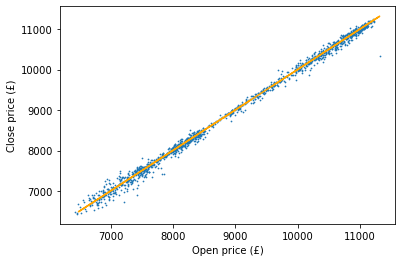

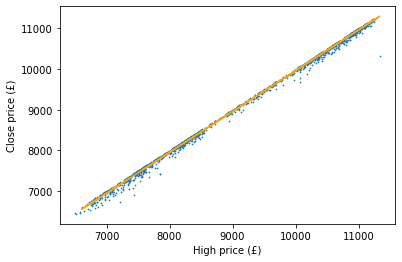

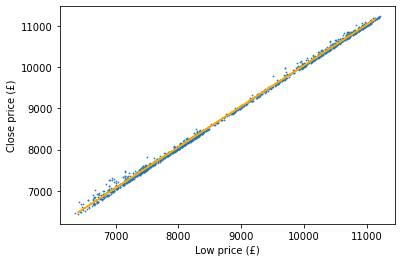

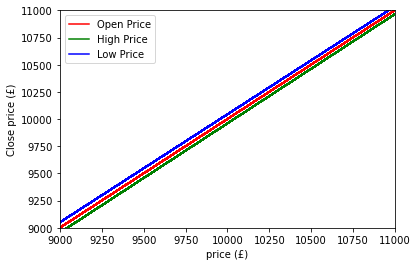

In [861]:
plt.scatter(Xo,y,s=0.5)
plt.plot(Xo_test.iloc[:,0],predictionsO,color='orange')
plt.xlabel("Open price (£)")
plt.ylabel("Close price (£)")
plt.show()
#plot the line of predicted Close price to Open price over a scatter of the original data

plt.scatter(Xh,y,s=0.5)
plt.plot(Xh_test.iloc[:,0],predictionsH,color='orange')
plt.xlabel("High price (£)")
plt.ylabel("Close price (£)")
plt.show()
#plot the line of predicted Close price to High price over a scatter of the original data

plt.scatter(Xl,y,s=0.5)
plt.plot(Xl_test.iloc[:,0],predictionsL,color='orange')
plt.xlabel("Low price (£)")
plt.ylabel("Close price (£)")
plt.show()
#plot the line of predicted Close price to Low price over a scatter of the original data

plt.plot(Xo_test.iloc[:,0],predictionsO,color='red',label='Open Price')
plt.plot(Xh_test.iloc[:,0],predictionsH,color='green',label='High Price')
plt.plot(Xl_test.iloc[:,0],predictionsL,color='blue',label='Low Price')
plt.xlim(9000, 11000)
plt.ylim(9000, 11000)
plt.xlabel("price (£)")
plt.ylabel("Close price (£)")
plt.legend()
plt.show()
#plot of all 3 lines predicting Close price on 1 graph to compare

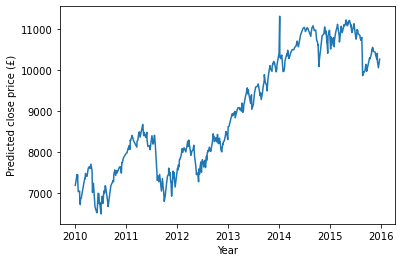

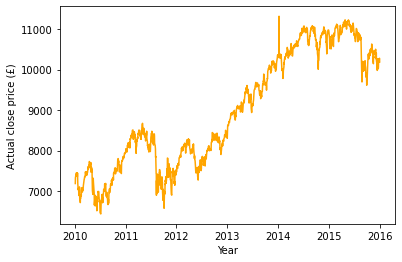

In [862]:
poDF = predictionsO
poDF = pd.DataFrame([x for _, x in sorted(zip(Xo_test.index.values, poDF))])
Xo_test = Xo_test.sort_index()
#sort the predicted values into the same order as the open values by zipping them together for graphing

newDates = []
for i in Xo_test.iloc[:,0].index.values:
    newDates.append(pd.to_datetime(dates.iloc[:,0][i]))
#get the dates that the predicted observations lie on for graphing
    
plt.plot(newDates,poDF.iloc[:,0])
plt.xlabel("Year")
plt.ylabel("Predicted close price (£)")
plt.show()
#plot predicted close price
#!!IF THIS GRAPH LOOKS SQUIGGLY AND WRONG, RERUN CODE BLOCK WITH COMMENT 'Xo training'!!

plt.plot(pd.to_datetime(dates.iloc[:,0]),Xo.iloc[:,0],color='orange')
plt.xlabel("Year")
plt.ylabel("Actual close price (£)")
plt.show()
#plot actual close price

### Multiple Linear Regression

In [863]:
indexDF = pd.read_csv('indexData.csv')
indexDF = indexDF.dropna()
indexDF = indexDF.drop(indexDF[(indexDF.Index != 'NYA') | (pd.to_datetime(indexDF.Date) < pd.to_datetime('2010-01-01')) | (pd.to_datetime(indexDF.Date) > pd.to_datetime('2016-01-01'))].index)
#read indexData into a pandas dataframe and remove all stock prices which arent NYA and during 2010 and 2015

In [864]:
indexDF.index = indexDF.index-11077
dates = pd.DataFrame(indexDF['Date'])
indexDF = indexDF.drop(columns = ['Index', 'Date', 'Adj Close', 'Volume'])
#set the index' of the data rows to start from 0 and save the dates in its own dataframe 
#drop Index Date Adj Close Volume from indexDF

In [865]:
X = indexDF[['Open','High','Low']]
y = indexDF['Close']
#define the independant variables set X and the dependant variable y

In [866]:
#X training
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
predictions = LinReg.predict(x_test)

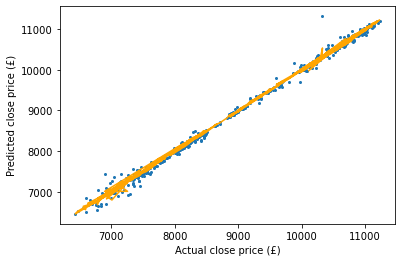

In [867]:
pDF = predictions
pDF = pd.DataFrame([x for _, x in sorted(zip(x_test.index.values, pDF))])
x_test = x_test.sort_index()
y_test = y_test.sort_index()
pDF = pDF.sort_index()
#sort the predicted values into the same order as the open values by zipping them together for graphing

newDates = []
for i in x_test.iloc[:,0].index.values:
    newDates.append(pd.to_datetime(dates.iloc[:,0][i]))
#get the dates that the predicted observations lie on for graphing

plt.scatter(y_test, x_test['Open'], s=4)
plt.plot(y_test, pDF.iloc[:,0], color = 'orange')
plt.xlabel("Actual close price (£)")
plt.ylabel("Predicted close price (£)")
plt.show()
#plot the line of predicted close prices to actualclose prices
#!!IF THIS GRAPH LOOKS SQUIGGLY AND WRONG, RERUN CODE BLOCK WITH TOP COMMENT 'X training'!!

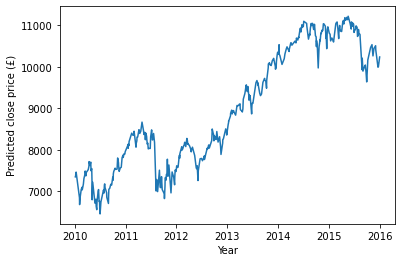

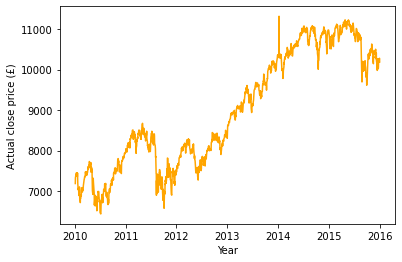

In [868]:
plt.plot(newDates,pDF.iloc[:,0])
plt.xlabel("Year")
plt.ylabel("Predicted close price (£)")
plt.show()
#plot predicted close price 

plt.plot(pd.to_datetime(dates.iloc[:,0]),Xo.iloc[:,0],color='orange')
plt.xlabel("Year")
plt.ylabel("Actual close price (£)")
plt.show()
#plot actual close price

In [873]:
print(LinReg.coef_)
pd.DataFrame(LinReg.coef_, X.columns, columns = ['ML Model Coeeficients'])
# produce table of the model's coefficients

[-0.59430148  0.80093917  0.791665  ]


,ML Model Coeeficients
Open,-0.594301
High,0.800939
Low,0.791665


In [871]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
MAE = metrics.mean_absolute_error(y_test, predictions)
R2 = metrics.r2_score(y_test, predictions)
print(RMSE,MAE,R2)
#calculate the 3 evaluation metrics and print them out

2109.301259561032 1701.3496292739167 -1.1620096590111157


### Polynomial Regression

In [828]:
indexDF = pd.read_csv('indexData.csv')
indexPredDF = pd.read_csv('indexData.csv')
#read indesxData into 2 pandas dataframe, one to perform the modelling on and one to predict the trend

indexDF = indexDF.dropna()
indexDF = indexDF.drop(indexDF[(indexDF.Index != 'NYA') | (pd.to_datetime(indexDF.Date) <= pd.to_datetime('2010-01-01')) | (pd.to_datetime(indexDF.Date) > pd.to_datetime('2014-06-15'))].index)
indexPredDF = indexPredDF.dropna()
indexPredDF = indexPredDF.drop(indexPredDF[(indexPredDF.Index != 'NYA') | (pd.to_datetime(indexPredDF.Date) <= pd.to_datetime('2014-06-15')) | (pd.to_datetime(indexPredDF.Date) > pd.to_datetime('2017-01-01'))].index)
#remove all stock prices which arent NYA and data not set in 2010-mid 2014 for modelling and then mid 2014-2016 for predicting

indexDF['Date'] = pd.to_datetime(indexDF.Date)
indexDF.index = indexDF['Date']
indexDF.index = (indexDF.index - pd.to_datetime('2010-01-01')).days
#set index to number of days since 2010-01-01 and convert the dates all to DateTime objects

In [829]:
x = np.array(indexDF.index.values)
y = np.array(indexDF['Close'])
#define the independant variable time as x and the dependant variable Close price as y

regression_model = LinearRegression()
poly = PolynomialFeatures(4)
X_transform = poly.fit_transform(x.reshape(-1, 1))
regression_model.fit(X_transform, y.reshape(-1, 1))
y_learned = regression_model.predict(X_transform)
#fit a 4th degree polynomial model to the data

newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 550))
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))
y_predict = regression_model.predict(X_extended_transform)
#extend the model to the future data

x = pd.to_datetime(indexDF.index, origin='2010-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='2010-01-01', unit='D')
#get the datetime of the data

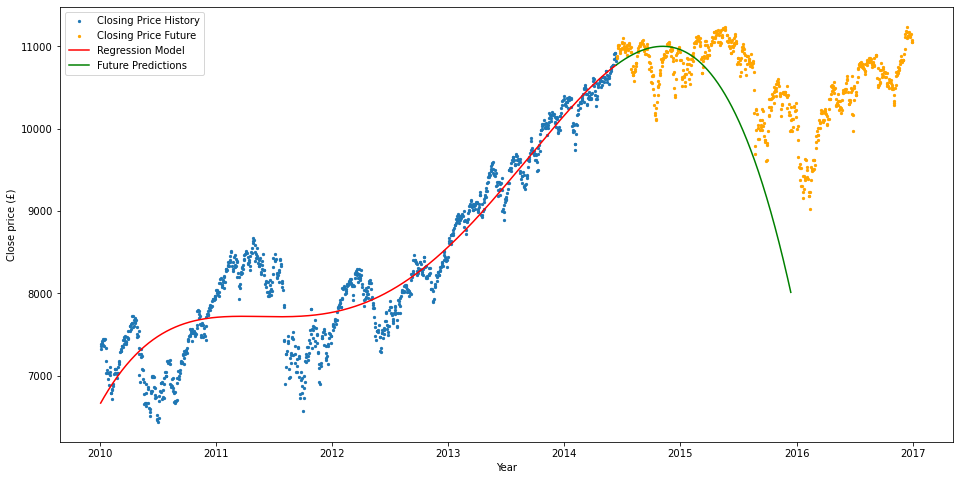

In [830]:
plt.figure(figsize=(16,8))
plt.scatter(x,indexDF['Close'], label='Closing Price History',s = 5)
plt.scatter(indexPredDF['Date'],indexPredDF['Close'], label='Closing Price Future',s = 5, color='orange')
plt.plot(x,y_learned, color='r', label='Regression Model')
plt.plot(future_x,y_predict, color='g', label='Future Predictions')
plt.xlabel("Year")
plt.ylabel("Close price (£)")
plt.legend()
plt.show()
#plot the Close price as a scatter graph and the model as a ploted line